In [ ]:
# HYPOTHESIS TESTING
# TODO: Visualization

In [ ]:
# Hypothesis 1: 
# Overall, there are more male than female authors who publish in the area of computer science. 

# Hypothesis 2: 
# In total, more has been written by men than by women.

In [1]:
# >>> Preparation
# Import stats to visualize
import pandas

print("Importing names... ")
stats = pandas.read_csv("data/stats_authors_contribs_by_gender_cor1.csv")

# Rename column: https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas
stats.rename(columns={'Unnamed: 0':'prop'}, inplace=True)
stats = stats.set_index("prop", drop = False)

print("Stats imported. They look like this: {}".format(stats))

Importing names... 
Stats imported. They look like this:                                     prop             1
prop                                                  
n_authors_f_cor          n_authors_f_cor  9.611025e+05
n_authors_f_min          n_authors_f_min  1.441980e+05
n_authors_m_cor          n_authors_m_cor  1.345316e+06
n_authors_m_min          n_authors_m_min  1.112117e+06
n_authors_u_max          n_authors_u_max  1.050103e+06
n_contribs_f_max        n_contribs_f_max  1.995975e+05
n_contribs_f_max_v2  n_contribs_f_max_v2  5.932080e+05
n_contribs_m_max        n_contribs_m_max  2.490484e+06
n_contribs_m_max_v2  n_contribs_m_max_v2  7.120339e+06
n_contribs_u_min        n_contribs_u_min  1.786655e+06
n_contribs_u_min_v2  n_contribs_u_min_v2  5.640198e+06


In [2]:
# >>> Testing
# Calculate statistics
n_authors_f_min = stats.at["n_authors_f_min", "1"]
n_authors_m_min = stats.at["n_authors_m_min", "1"]
n_authors_u_max = stats.at["n_authors_u_max", "1"]

n_authors_f_max = stats.at["n_authors_f_cor", "1"]
n_authors_m_max = stats.at["n_authors_m_cor", "1"]

n_contribs_f_max = stats.at["n_contribs_f_max", "1"]
n_contribs_m_max = stats.at["n_contribs_m_max", "1"]
n_contribs_u_min = stats.at["n_contribs_u_min", "1"]

n_contribs_f_max_v2 = stats.at["n_contribs_f_max_v2", "1"]
n_contribs_m_max_v2 = stats.at["n_contribs_m_max_v2", "1"]
n_contribs_u_min_v2 = stats.at["n_contribs_u_min_v2", "1"]

In [3]:
# Logging results
print("At maximum, men contributed {} times more than women".format(n_contribs_m_max / n_contribs_f_max))
print("At minimum, men contributed {} times more than women".format(n_contribs_m_max / (n_contribs_f_max + n_contribs_u_min)))
print("At maximum, men contributed to {} times more publications than women (publications can be counted several times)".format(n_contribs_m_max_v2 / n_contribs_f_max_v2))
print("")
print("There are at maximum {} times more male than female authors.".format(n_authors_m_max / n_authors_f_max))
print("There are at minimum {} times more male than female authors.".format(n_authors_m_min / n_authors_f_min))
print("")
print("There are at maximum {} authors of unknown gender, who made {} contributions.".format(n_authors_u_max, n_contribs_u_min))
print("These authors of unknown gender contributed to a maximum of {} publications (publications can be counted several times)".format(n_contribs_u_min_v2))
'''
At minimum, 19869.0 female authors made 29548.627248654702 contributions and 539864.0 male authors made 1263411.8767900162 contributions
At maximum, 144198.0 female authors made 199597.48538935184 contributions and 1112117.0 male authors made 1263411.8767900162 contributions

At maximum, men contributed 42.757041339290545 times more than women
At minimum, men contributed 6.329798565976407 times more than women

At minimum, 19869.0 female authors contributed to 86725.0 publications and 539864.0 male authors contributed to 3525581.0 publications (publications can be counted several times)
At maximum, 144198.0 female authors contributed to 593208.0 publications and 1112117.0 male authors contributed to 7120339.0 publications (publications can be counted several times)

At maximum, men contributed to publications 40.65241856442779 times more than women (publications can be counted several times)
At minimum, men contributed to publications 12.003106836050762 times more than women (publications can be counted several times)

There are at maximum 27.17117117117117 times more male than female authors.
There are at minimum 7.712430130792383 times more male than female authors.

There are between 1050103.0 and 1746685.0 authors of unknown gender, who made between 1786655.1303914874 and 3183776.49596133 contributions.
These authors of unknown gender contributed to 5640198.0 to 9741439.0 publications
'''
''' CORRECTED
At maximum, men contributed 12.477533869532543 times more than women
At maximum, men contributed to 12.003106836050762 times more publications than women (publications can be counted several times)

There are at maximum 1.3997627724410246 times more male than female authors.
There are at minimum 7.712430130792383 times more male than female authors.

There are at maximum 1050103.0 authors of unknown gender, who made 1786655.1303914874 contributions.
These authors of unknown gender contributed to a maximum of 5640198.0 publications (publications can be counted several times)
'''

At maximum, men contributed 12.477533869532543 times more than women
At minimum, men contributed 1.2538608455098752 times more than women
At maximum, men contributed to 12.003106836050762 times more publications than women (publications can be counted several times)

There are at maximum 1.3997627724410246 times more male than female authors.
There are at minimum 7.712430130792383 times more male than female authors.

There are at maximum 1050103.0 authors of unknown gender, who made 1786655.1303914874 contributions.
These authors of unknown gender contributed to a maximum of 5640198.0 publications (publications can be counted several times)


' CORRECTED\nAt maximum, men contributed 12.477533869532543 times more than women\nAt maximum, men contributed to 12.003106836050762 times more publications than women (publications can be counted several times)\n\nThere are at maximum 1.3997627724410246 times more male than female authors.\nThere are at minimum 7.712430130792383 times more male than female authors.\n\nThere are at maximum 1050103.0 authors of unknown gender, who made 1786655.1303914874 contributions.\nThese authors of unknown gender contributed to a maximum of 5640198.0 publications (publications can be counted several times)\n'

In [4]:
# >>> Visualization
# Preparation

import matplotlib.pyplot as plt
import numpy as np

size = 0.3

# Colors for the pie chart
cmap = plt.get_cmap("tab20c")

Text(0.5, 1.0, 'How many male and female authors are there?')

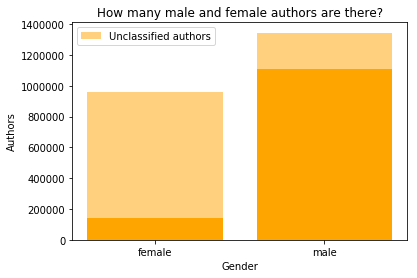

In [5]:
# H1
plt.bar(["female", "male"], [n_authors_f_max, n_authors_m_max], alpha=0.5, color="orange", label="Unclassified authors")
plt.bar(["female", "male"], [n_authors_f_min, n_authors_m_min], color="orange")
plt.xlabel("Gender")
plt.ylabel("Authors")
plt.legend()
plt.title("How many male and female authors are there?")

Text(0.5, 1.0, 'How many male and female authors are there?')

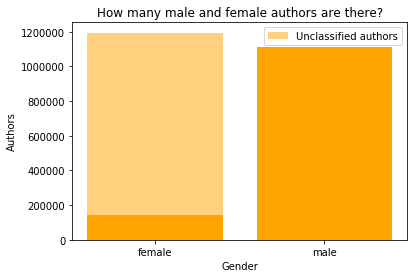

In [6]:
# H1 - if all unclassified were women
plt.bar(["female", "male"], [n_authors_f_min + n_authors_u_max, n_authors_m_min], alpha=0.5, color="orange", label="Unclassified authors")
plt.bar(["female", "male"], [n_authors_f_min, n_authors_m_min], color="orange")
plt.xlabel("Gender")
plt.ylabel("Authors")
plt.legend()
plt.title("How many male and female authors are there?")

Text(0.5, 1.0, 'How many contributions did male and female authors make?')

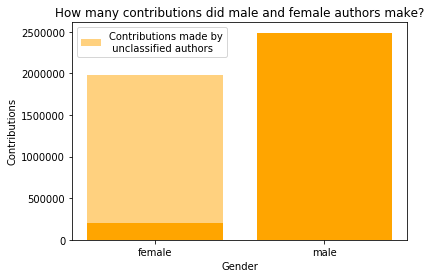

In [7]:
# H2
plt.bar(["female", "male"], [n_contribs_f_max + n_contribs_u_min, n_contribs_m_max], alpha=0.5, color="orange", label="Contributions made by\n unclassified authors")
plt.bar(["female", "male"], [n_contribs_f_max, n_contribs_m_max], color="orange")
plt.xlabel("Gender")
plt.ylabel("Contributions")
plt.legend()
plt.title("How many contributions did male and female authors make?")

In [8]:
# >>> Evaluation
# Hypothesis 1 and 2 are correct. 
# Overall, there are more male than female authors. In total, more has been written by men than by women.